## Dependencies
***

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Data Sets
***

In [3]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA+Data.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


### DataFrame Cleaning/Manipulation
***

In [4]:
#preview DataFrames
#print(nba_data_df.count())
#print(height_weight_df.count())

In [5]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [6]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


### Merged Data Frames

In [7]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,176.0,NaN,NaN,NaN,217.0,458.0,G-F,170,71,5ft 11in
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,77.0,NaN,NaN,NaN,97.0,202.0,G-F,170,71,5ft 11in
2,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,109.0,NaN,NaN,NaN,99.0,279.0,G,185,74,6ft 2in
3,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,115.0,NaN,NaN,NaN,98.0,152.0,G,185,74,6ft 2in
4,1952,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,70.0,NaN,NaN,NaN,56.0,126.0,G,185,74,6ft 2in


### Cleaning Data Frame: 'complete_df'

In [8]:
#remove 'unnamed' and 'position' columns

complete_df = merged_df.drop(["position"],axis=1)
complete_df = complete_df.sort_values(by="Year")


In [9]:
#Conditional function to isolate big men and small men

def f(row):
    if row['Pos'] == 'C' or row['Pos'] == 'F' or row['Pos'] == 'C-F' or row['Pos'] == 'F-C' or row ['Pos'] == 'PF':
        val = 'bm'
    else:
        val = 'sm'
    return val
complete_df['men'] = complete_df.apply(f, axis = 1)

In [10]:
#Clean complete df further

complete_df = complete_df.reset_index()
complete_df = complete_df.drop(['index'],axis=1)

#complete_df.head()

##--Year Filter--#

year_filter = (complete_df.Year >= 1990)
complete_df = complete_df[year_filter]
complete_df.head()


,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet),men
8468,1990,Mike Smrek,C,27.0,GSW,13.0,3.0,107.0,7.1,0.394,...,1.0,4.0,11.0,9.0,18.0,21.0,250,85,7ft 1in,bm
8469,1990,Jay Humphries,PG,27.0,MIL,81.0,81.0,2818.0,16.4,0.547,...,472.0,156.0,11.0,151.0,253.0,1237.0,185,75,6ft 3in,sm
8470,1990,A.C. Green,PF,26.0,LAL,82.0,82.0,2709.0,14.7,0.548,...,90.0,66.0,50.0,116.0,207.0,1061.0,220,81,6ft 9in,bm
8471,1990,Ron Harper,SG,26.0,LAC,28.0,28.0,1105.0,20.0,0.553,...,133.0,67.0,32.0,82.0,80.0,644.0,185,78,6ft 6in,sm
8472,1990,Gerald Henderson,PG,34.0,TOT,57.0,0.0,464.0,11.9,0.584,...,74.0,16.0,2.0,24.0,50.0,135.0,215,77,6ft 5in,sm


### Cleaning Big Men and Small Men DataFrames

In [11]:
#isolate big men and small men and store them in: big_men_df and small_men_df respectively

#--big men--#
big_men_df = complete_df.loc[complete_df['men']=='bm']

#--small men--#
small_men_df = complete_df.loc[complete_df['men']=='sm']

#Test print both: big_men_df and small_men_df

big_men_df.head()
#small_men_df.head()
big_men_df.columns

Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'weight', 'height (inches)', 'height(feet)',
       'men'],
      dtype='object')

In [47]:
#----Isolating Big Men Into Sub-groups by year----#

big_men_grouped = big_men_df.groupby('Year')

#---Isolating Small Men Into Sub-groups by year---#

small_men_grouped = small_men_df.groupby('Year')

big_men_grouped.get_group(1990).columns




Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'weight', 'height (inches)', 'height(feet)',
       'men'],
      dtype='object')

##  Exploratory Data Analysis
***


### Overview of Big Men
***

#### Field Goals Attempted
***

In [13]:
#Total Field Gaols attempted for both big men and small men

#---Big Men---#

fga_big = big_men_grouped.FGA.mean()
fga_big

#Turn into DataFrame

fga_big = fga_big.to_frame()


#Reset index of DataFrame
fga_big  = fga_big.reset_index()
fga_big.head()


,Year,FGA
0,1990,370.117318
1,1991,356.291209
2,1992,375.722892
3,1993,334.796875
4,1994,300.638095


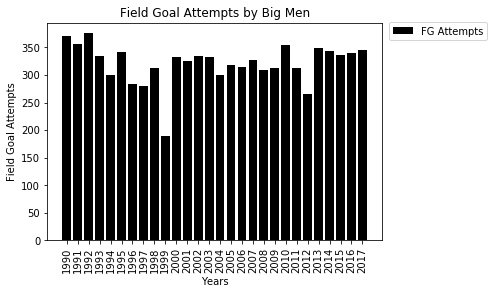

In [46]:
#Big Men FGA Graphical
fga_big_plot = plt.bar(fga_big["Year"], fga_big["FGA"], color='Black')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([fga_big_plot], ["FG Attempts"], loc='best', bbox_to_anchor = (1.33,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Field Goal Attempts")
plt.title("Field Goal Attempts by Big Men")


plt.show()

#### Field Goal Percentage 
***

In [15]:
#---Big Men---#

fgp_big = big_men_grouped['FG%'].mean()
fgp_big

#Turn into DataFrame

fgp_big = fgp_big.to_frame()


#Reset index of DataFrame
fgp_big  = fgp_big.reset_index()
fgp_big.head()


,Year,FG%
0,1990,0.454268
1,1991,0.469188
2,1992,0.469445
3,1993,0.464161
4,1994,0.454101


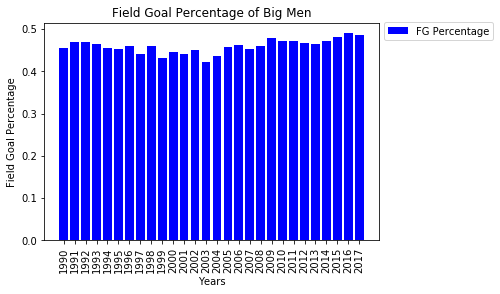

In [45]:
#Big Men Field Goal Percentage Graphical
fgp_big_plot = plt.bar(fgp_big["Year"], fgp_big["FG%"], color='Blue')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([fgp_big_plot], ["FG Percentage"], loc='best', bbox_to_anchor = (1,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Field Goal Percentage")
plt.title("Field Goal Percentage of Big Men")


plt.show()

#### Two Point Attempts 
***

In [17]:
#---Big Men---#

two_att_big = big_men_grouped['2PA'].mean()
two_att_big

#Turn into DataFrame

two_att_big = two_att_big.to_frame()


#Reset index of DataFrame
two_att_big  = two_att_big.reset_index()
two_att_big.head()

,Year,2PA
0,1990,359.245810
1,1991,347.807692
2,1992,366.542169
3,1993,323.291667
4,1994,290.795238


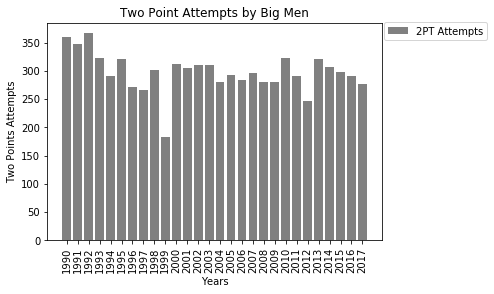

In [44]:
#Big Men Field Goal Percentage Graphical
two_att_big_plot = plt.bar(two_att_big["Year"], two_att_big["2PA"], color='Grey')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([two_att_big_plot], ["2PT Attempts"], loc='best', bbox_to_anchor = (1.33,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Two Points Attempts")
plt.title("Two Point Attempts by Big Men")


plt.show()

#### Two Point Percentage
***

In [19]:
#Two point percentage
two_per_big = big_men_grouped['2P%'].mean()
two_per_big

#Turn into DataFrame

two_per_big = two_per_big.to_frame()


#Reset index of DataFrame
two_per_big  = two_per_big.reset_index()
two_per_big.head()

,Year,2P%
0,1990,0.460804
1,1991,0.476541
2,1992,0.475195
3,1993,0.474042
4,1994,0.459251


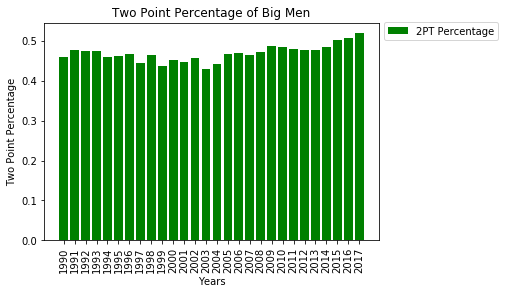

In [43]:
#Big Men Two Point Percentage Graphical
two_per_big_plot = plt.bar(two_per_big["Year"], two_per_big["2P%"], color='Green')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([two_per_big_plot], ["2PT Percentage"], loc='best', bbox_to_anchor = (1,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Two Point Percentage")
plt.title("Two Point Percentage of Big Men")


plt.show()

#### Three Point Attempts 
***

In [21]:
#---Big Men---#

three_att_big = big_men_grouped['3PA'].mean()
three_att_big

#Turn into DataFrame

three_att_big = three_att_big.to_frame()


#Reset index of DataFrame
three_att_big  = three_att_big.reset_index()
three_att_big.head()

,Year,3PA
0,1990,10.871508
1,1991,8.483516
2,1992,9.180723
3,1993,11.505208
4,1994,9.842857


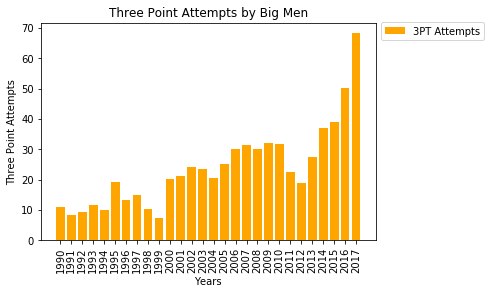

In [42]:
#Big Men Field Goal Percentage Graphical
three_att_big_plot = plt.bar(three_att_big["Year"], three_att_big["3PA"], color='Orange')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([three_att_big_plot], ["3PT Attempts"], loc='best', bbox_to_anchor = (1,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Three Point Attempts")
plt.title("Three Point Attempts by Big Men")


plt.show()

#### Three Point Percentage 
***

In [23]:
#Two point percentage
three_per_big = big_men_grouped['3P%'].mean()
three_per_big

#Turn into DataFrame

three_per_big = three_per_big.to_frame()


#Reset index of DataFrame
three_per_big  = three_per_big.reset_index()
three_per_big.head()

,Year,3P%
0,1990,0.149252
1,1991,0.138048
2,1992,0.139093
3,1993,0.143287
4,1994,0.137602


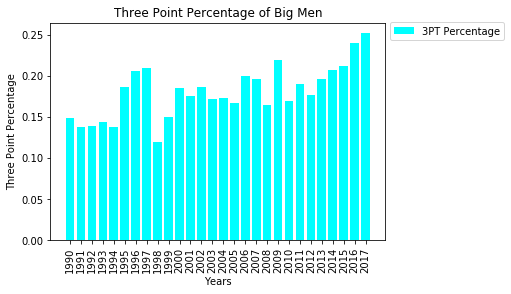

In [41]:
#Big Men Two Point Percentage Graphical
three_per_big_plot = plt.bar(three_per_big["Year"], three_per_big["3P%"], color='cyan')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([three_per_big_plot], ["3PT Percentage"], loc='best', bbox_to_anchor = (1,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Three Point Percentage")
plt.title("Three Point Percentage of Big Men")


plt.show()

#### Free Throws Attempted
***

In [25]:
#---Big Men---#

fta_big = big_men_grouped.FTA.mean()
fta_big

#Turn into DataFrame

fta_big = fta_big.to_frame()


#Reset index of DataFrame
fta_big  = fta_big.reset_index()
fta_big.head()

,Year,FTA
0,1990,138.335196
1,1991,126.203297
2,1992,130.475904
3,1993,119.208333
4,1994,106.080952


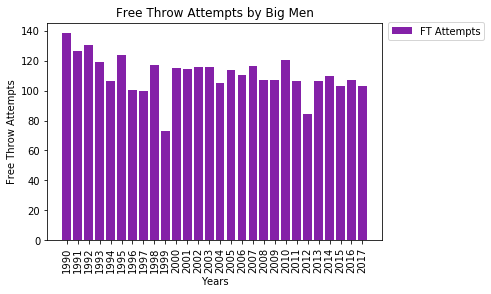

In [40]:
#Big Men Free Throws Graphical
fta_big_plot = plt.bar(fta_big["Year"], fta_big["FTA"], color='#8421a8')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=1),rotation='vertical')
plt.legend([fta_big_plot], ["FT Attempts"], loc='best', bbox_to_anchor = (1.32,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Free Throw Attempts")
plt.title("Free Throw Attempts by Big Men")


plt.show()

#### Free Throw Percentage
***

In [27]:
ftp_big = big_men_grouped['FT%'].mean()
ftp_big

#Turn into DataFrame

ftp_big = ftp_big.to_frame()


#Reset index of DataFrame
ftp_big  = ftp_big.reset_index()
ftp_big.head()

,Year,FT%
0,1990,0.665614
1,1991,0.684525
2,1992,0.689242
3,1993,0.684113
4,1994,0.650406


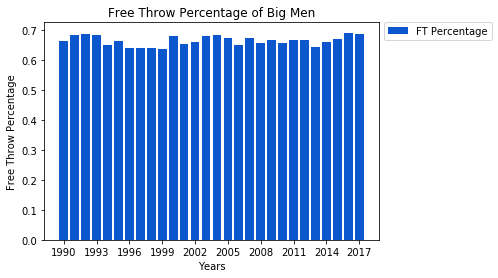

In [37]:
#Big Men Free Throws Graphical
ftp_big_plot = plt.bar(ftp_big["Year"], ftp_big["FT%"], color='#0c56ce')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([ftp_big_plot], ["FT Percentage"], loc='best', bbox_to_anchor = (1,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Free Throw Percentage")
plt.title("Free Throw Percentage of Big Men")


plt.show()

#### Average minutes played 
***

In [29]:
#Get the average minutes played for both big men 

#---Big Men---#

avg_min_big = big_men_grouped.MP.mean()
avg_min_big

#Turn into DataFrame

avg_min_big = avg_min_big.to_frame()


#Reset index of DataFrame
avg_min_big = avg_min_big.reset_index()
print(avg_min_big.head())

   Year           MP
0  1990  1172.078212
1  1991  1161.230769
2  1992  1196.650602
3  1993  1045.364583
4  1994   960.542857


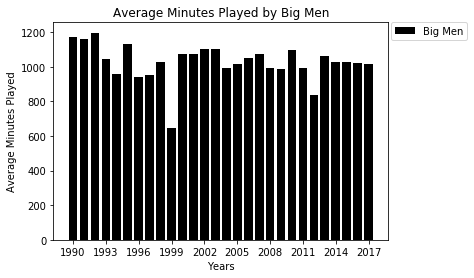

In [30]:
#Big Men Minutes


big_plot = plt.bar(avg_min_big["Year"], avg_min_big["MP"], color='Black')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Big Men")


plt.show()

#### Average Height of Big Men
***

In [48]:
#---Big Men---#

avg_h_big = big_men_grouped['height (inches)'].mean()
avg_h_big

#Turn into DataFrame

avg_h_big = avg_h_big.to_frame()


#Reset index of DataFrame
avg_h_big = avg_h_big.reset_index()
print(avg_h_big.head())

   Year  height (inches)
0  1990        82.268156
1  1991        82.291209
2  1992        82.222892
3  1993        82.026042
4  1994        82.261905


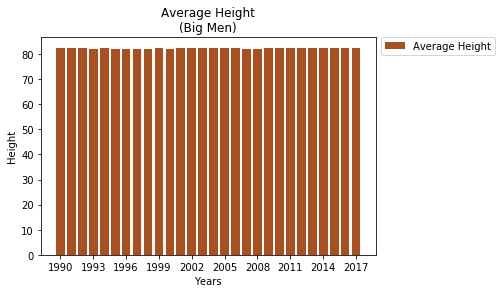

In [51]:
#Big Men Minutes


avg_h_big_plot = plt.bar(avg_h_big["Year"], avg_h_big["height (inches)"], color='#a85020')


#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([avg_h_big_plot], ["Average Height"], loc='best', bbox_to_anchor = (1,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Height")
plt.title("Average Height\n(Big Men)")


plt.show()

#### Average Weight of Big Men
***

***
### Big Men Comparisons
***

#### Two Point Attempts vs Two Point Percentage (Big Men)
***

#### Two Point Attempts vs Three Point Attempts (Big Men)
***

Text(0.5, 1.0, 'Two Point Attempts vs Three Point Attempts\n(Big Men)')

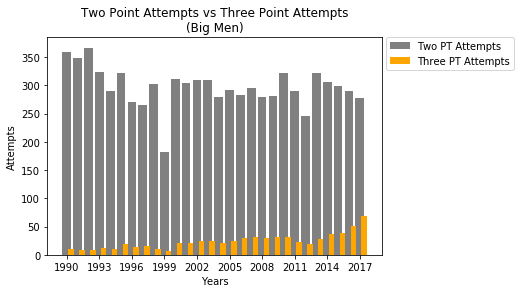

In [31]:
#Twos vs Threes
plt.bar(two_att_big["Year"] + 0, two_att_big["2PA"], color='Grey',width=0.8)
plt.bar(three_att_big["Year"] + 0.4, three_att_big["3PA"], color='Orange',width=0.5)

#Change values of xticks
plt.xticks(np.arange(1990,2018,step=3))
plt.legend([two_att_big_plot,three_att_big_plot], ["Two PT Attempts", "Three PT Attempts"], loc='best', bbox_to_anchor = (1.41,1.025))
plt.xlabel("Years")
plt.ylabel("Attempts")
plt.title("Two Point Attempts vs Three Point Attempts\n(Big Men)")

#### Two Point Percentage vs Three Point Percentage (Big Men)
***

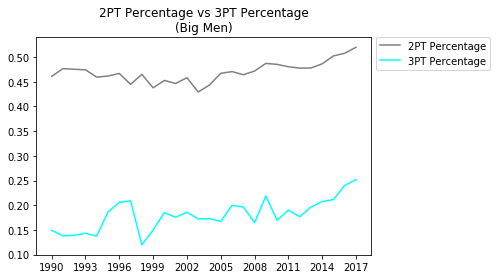

In [38]:
plt.plot(two_per_big["Year"], two_per_big["2P%"], label = "2PT Percentage",c='Grey')
plt.plot(three_per_big["Year"], three_per_big["3P%"], label="3PT Percentage",c='cyan')

plt.xticks(np.arange(1990,2018, step=3))
plt.legend(bbox_to_anchor = (1.37,1.025))
plt.title("2PT Percentage vs 3PT Percentage\n(Big Men)")

plt.show()

#### Minutes Played vs Points Scored (Big Men)
***

###  Statistical Data Analysis
***